<a href="https://colab.research.google.com/github/RaihanFazzaufaR/22_RaihanFazzaufaRasendriya/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection

Metode yang digunakan:
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Template Matching
**cv.matchTemplate()** dengan parameter
- image: citra input
- tempt: template yang dicari, ukurannya tidak boleh lebih besar dari citra input.
- method: metode dari template matching.

Jenis metode template matching di OpenCV:
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

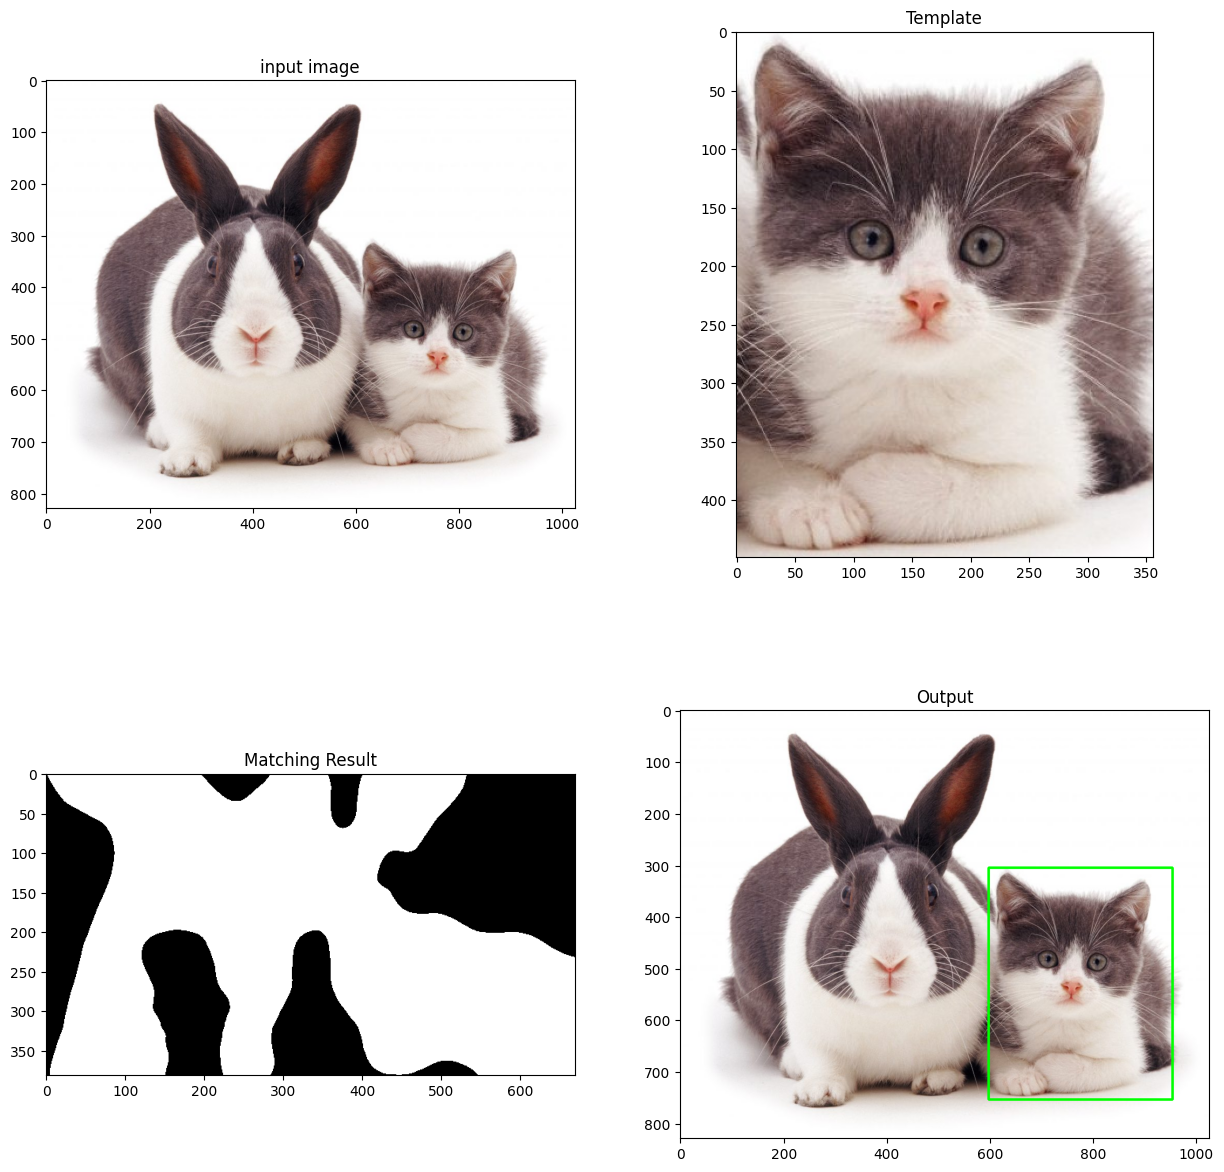

In [8]:
image = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/cats_and_bunnies.jpg")
tempt = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/cat2_templatejpg.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
tempt_gray = cv2.cvtColor(tempt, cv2.COLOR_BGR2GRAY)

ccoeff_match = cv2.matchTemplate(image, tempt, cv2.TM_CCOEFF)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(ccoeff_match)

top_left = max_loc
bottom_right = (top_left[0] + tempt.shape[1], top_left[1] + tempt.shape[0])

image_with_box = image.copy()
cv2.rectangle(image_with_box, top_left, bottom_right, (0, 255, 0), 3)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("input image")
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(tempt, cv2.COLOR_BGR2RGB))
plt.title("Template")
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(ccoeff_match, cv2.COLOR_BGR2RGB))
plt.title("Matching Result")
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
plt.title("Output")
plt.show()


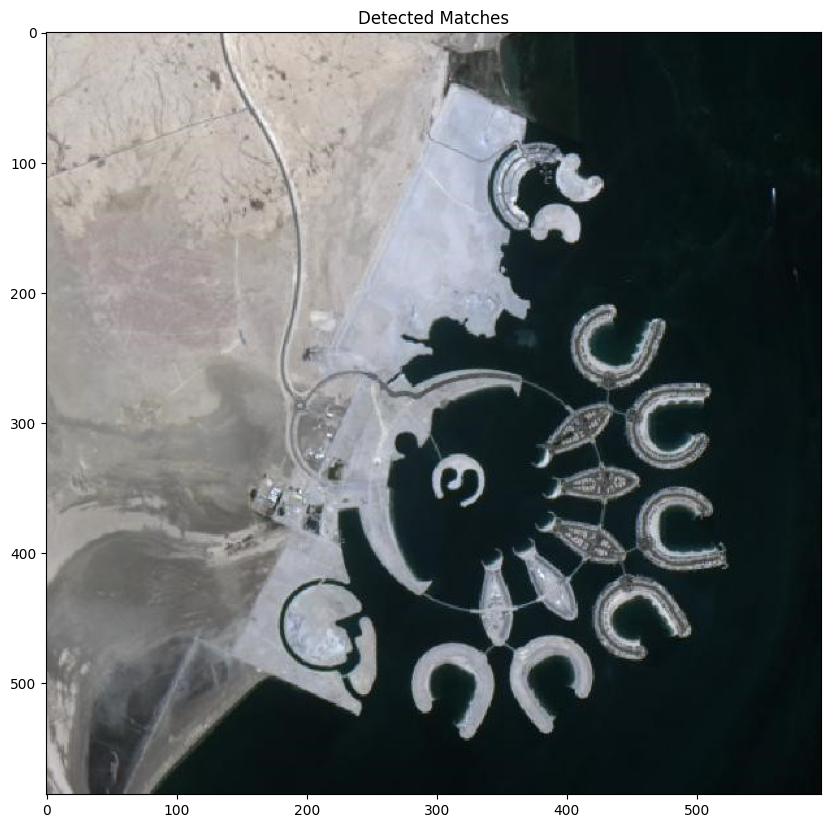

In [15]:
def template_matching_ssd(image, template, threshold):
    h, w = template.shape
    img_h, img_w = image.shape
    matches = []

    # Iterasi melalui semua piksel yang memungkinkan di gambar
    for y in range(img_h - h + 1):
        for x in range(img_w - w + 1):
            # Memotong bagian gambar sesuai ukuran template
            sub_image = image[y:y+h, x:x+w].astype(np.float32)
            template_float = template.astype(np.float32)

            # Menghitung SSD antara template dan bagian gambar
            ssd = np.sum((sub_image - template_float) ** 2)

            # Jika SSD kurang dari threshold, simpan lokasi tersebut sebagai match
            if ssd < threshold:
                matches.append((x, y))

    return matches

# Membaca gambar utama dan template
image = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain.jpg")
template = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain-template.jpg")

# Konversi gambar utama dan template ke skala abu-abu
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Mengatur threshold yang lebih rendah untuk mengurangi pendeteksian yang tidak perlu
threshold = 2e2  # Sesuaikan threshold sesuai kebutuhan

# Melakukan template matching
matches = template_matching_ssd(image_gray, template_gray, threshold)

# Menampilkan hasil dengan gambar berwarna
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Matches")
for (x, y) in matches:
    # Menggambar kotak pembatas di lokasi yang cocok
    rect = plt.Rectangle((x, y), template_gray.shape[1], template_gray.shape[0], edgecolor='r', facecolor='none', linewidth=2)
    plt.gca().add_patch(rect)
plt.show()

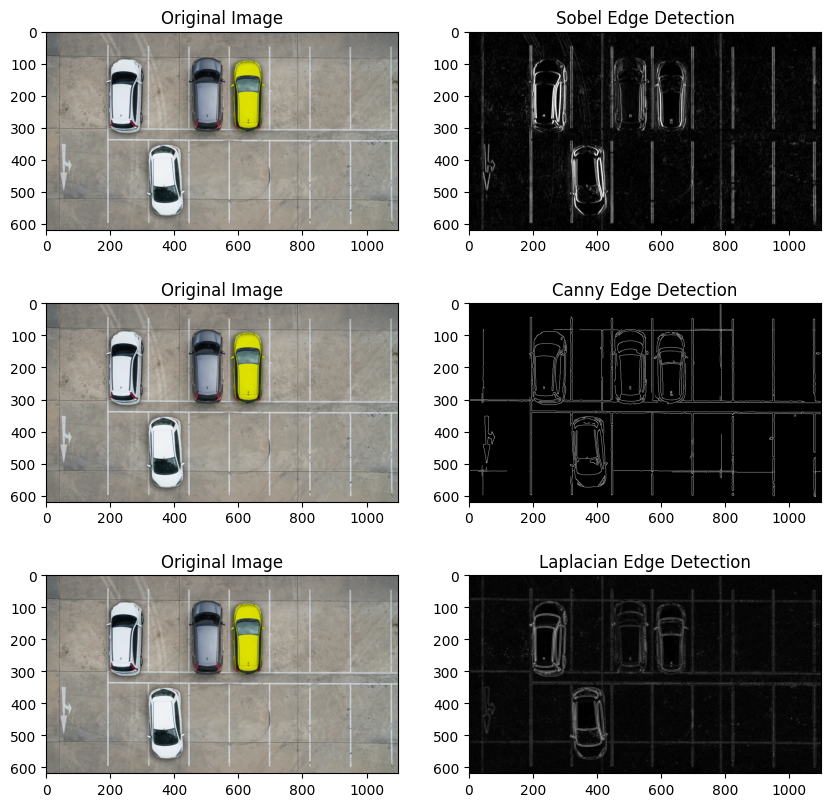

In [19]:
image = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 1.4)

edges_sobel = cv2.Sobel(blurred, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
edges_canny = cv2.Canny(blurred, threshold1=50, threshold2=150)
edges_laplacian = cv2.Laplacian(blurred, ddepth=cv2.CV_64F)

edges_sobel = cv2.convertScaleAbs(edges_sobel)
edges_laplacian = cv2.convertScaleAbs(edges_laplacian)

plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(3, 2, 2)
plt.imshow(edges_sobel, cmap='gray')
plt.title("Sobel Edge Detection")
plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(3, 2, 4)
plt.imshow(edges_canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.subplot(3, 2, 5)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(3, 2, 6)
plt.imshow(edges_laplacian, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.show()

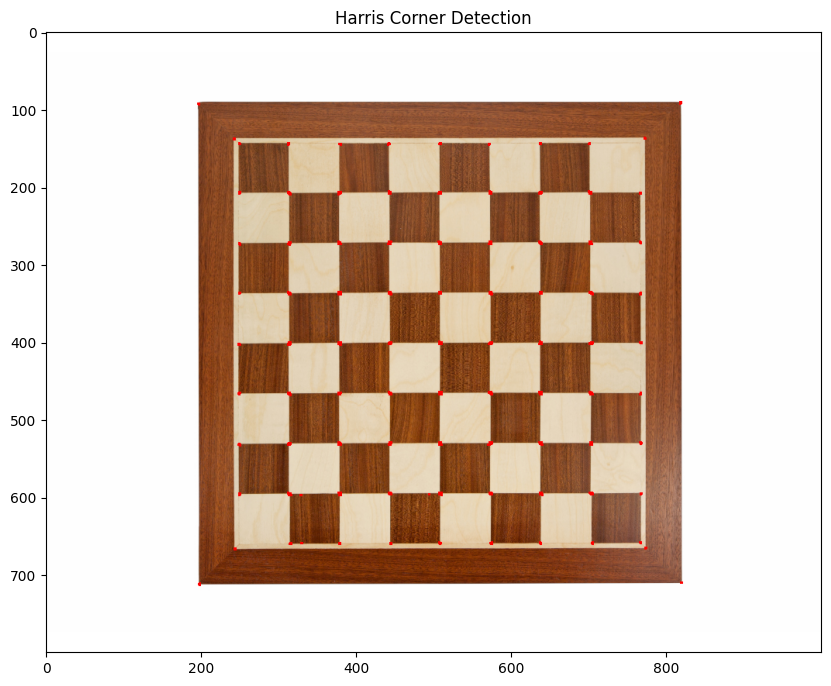

In [20]:
image = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

harris_corners = cv2.dilate(harris_corners, None)

image_harris = image.copy()
threshold = 0.01 * harris_corners.max()
image_harris[harris_corners > threshold] = [0, 0, 255]

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_harris, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.show()

<ipython-input-21-32f0aa3a719b>:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


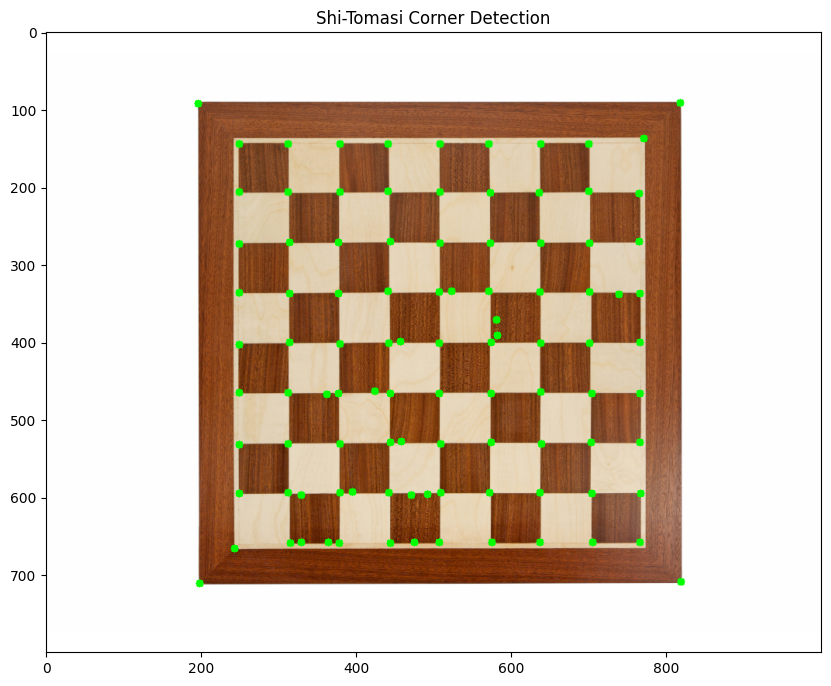

In [21]:
image = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

image_shi_tomasi = image.copy()
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image_shi_tomasi, (x, y), 5, (0, 255, 0), -1)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_shi_tomasi, cv2.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corner Detection")
plt.show()

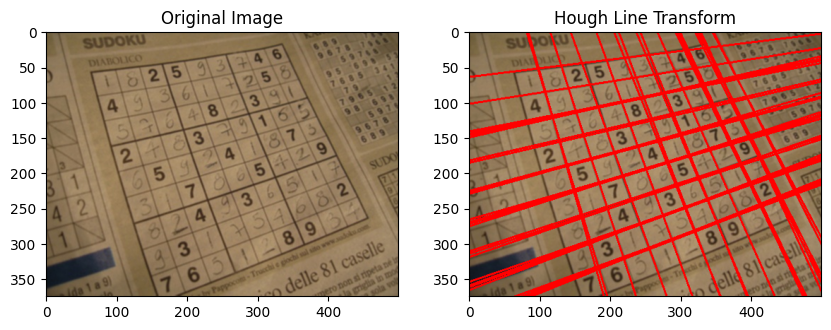

In [76]:
# Membaca gambar
image = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/sudoku.jpg")

# Mendeteksi tepi menggunakan Canny Edge Detection
edges = cv2.Canny(image, 50, 150)

# Mendeteksi garis dengan Hough Line Transform
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=160)

# Menggambar garis pada gambar asli
image_hough = image.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(image_hough, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Menampilkan hasil
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_hough, cv2.COLOR_BGR2RGB))
plt.title("Hough Line Transform")
plt.show()

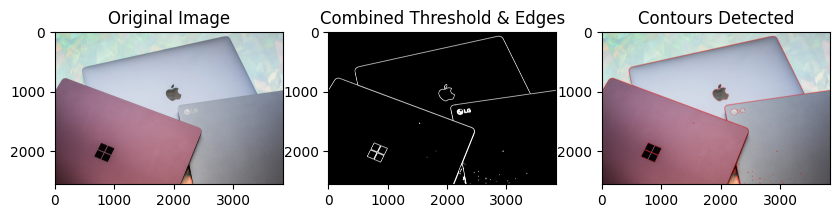

In [77]:
# Membaca gambar
image = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/laptop.jpg")

# Mengonversi gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menggunakan Gaussian Blur untuk mengurangi noise
edges_detect = cv2.Canny(gray, 50, 150)

# Menggunakan adaptive thresholding untuk segmentasi gambar
thresh = cv2.adaptiveThreshold(edges_detect, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Menggabungkan hasil thresholding dan deteksi tepi
combined = cv2.bitwise_or(thresh, edges_detect)

# Mencari kontur dengan findContours
contours, hierarchy = cv2.findContours(combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Menggambar kontur pada gambar asli
image_contours = image.copy()
cv2.drawContours(image_contours, contours, -1, (0, 0, 255), 2)

# Menampilkan hasil
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(combined, cmap='gray')
plt.title("Combined Threshold & Edges")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.title("Contours Detected")
plt.show()

In [78]:
import cv2
import os

In [ ]:
path_plate = "dataset/sliced"